# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2005 Мокин Александр
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [15]:
def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix


 
def create_graph(graph, matrix, way = [], node_color='blue',edge_color = 'blue', 
                 edge_text_pos = 0.5, node_size=1600, node_alpha=0.3,
                 way_color = 'red', edge_alpha=0.3, edge_tickness=1, 
                 node_text_size=12, text_font='sans-serif'):
    
    matrix_size = len(matrix)
    for i in range(matrix_size):
        graph.add_node(i + 1,pos = (i + 2,i * 2))
        
    edges = []
    sides = []
    colors = []
    for i in range(matrix_size):
        for j in range(matrix_size):
            if matrix[i][j] != 0:
                graph.add_edge(i + 1, j + 1, weight = matrix[i][j], color = 'green')
                edges.append((i + 1, j + 1))
                sides.append(matrix[i][j])
                if (i + 1, j + 1) not in way:
                    colors.append(edge_color)
                else:
                    colors.append(way_color)
    
    # layout set
    graph_pos = nx.planar_layout(graph)
    # draw graph
    nx.draw_networkx_nodes(graph,graph_pos,node_size=node_size,alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(graph,graph_pos,width=edge_tickness,alpha=edge_alpha,edge_color=colors)
    nx.draw_networkx_labels(graph, graph_pos,font_size=node_text_size, font_family=text_font)
    
       
    edge_labels = dict(zip(edges, sides))
    nx.draw_networkx_edge_labels(graph, graph_pos, edge_labels=edge_labels, label_pos=edge_text_pos)

    # show graph
    plt.figure(figsize=(10,10))
    plt.show()

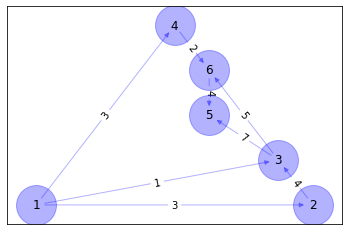

<Figure size 720x720 with 0 Axes>

In [17]:
graph = nx.DiGraph()
matrix = read_matrix('src/lab_06_02_in.txt')
create_graph(graph, matrix)

labels = nx.get_edge_attributes(graph,'weight')
nodes_len = len(graph.nodes)
adj_matrix = np.array([[math.inf] * nodes_len] * nodes_len)

for pos, length in labels.items():
    adj_matrix[pos[0] - 1][pos[1] - 1] = length

###  Алгоритм Флойда-Уоршелла

### Алгоритм Дейкстры

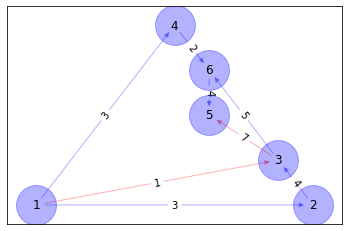

<Figure size 720x720 with 0 Axes>

In [16]:
def arg_min(T, S):
    amin = -1
    maximal = math.inf  # максимальное значение
    for i, t in enumerate(T):
        if t < maximal and i not in S:
            maximal = t
            amin = i
    return amin

def dijkstra_way(matrix, start, end):
    nodes_len = len(matrix[0])  # число вершин в графе
    T = [math.inf] * nodes_len   # последняя строка таблицы

    start_pos = 0       # стартовая вершина (нумерация с нуля)
    visited_nodes = {start_pos}     # просмотренные вершины
    T[start_pos] = 0    # нулевой вес для стартовой вершины
    M = [0] * nodes_len   # оптимальные связи между вершинами

    while start_pos != -1:          # цикл, пока не просмотрим все вершины
        for j, dw in enumerate(matrix[start_pos]):   # перебираем все связанные вершины с вершиной v
            if j not in visited_nodes:    # если вершина еще не просмотрена
                w = T[start_pos] + dw
                if w < T[j]:
                    T[j] = w
                    M[j] = start_pos       # связываем вершину j с вершиной v

        start_pos = arg_min(T, visited_nodes)            # выбираем следующий узел с наименьшим весом
        if start_pos >= 0:                    # выбрана очередная вершина
            visited_nodes.add(start_pos)                 # добавляем новую вершину в рассмотрение

    # формирование оптимального маршрута:
    
    way = [end]
    while end != start:
        end = M[way[-1]]
        way.append(end)
    # преобразуем ответ в список ребер для оптимального пути
    result = []
    
    for i in range(len(way) - 1, 0, -1):
        result.append((way[i] + 1, way[i - 1] + 1))
        
    return result

start = 1
end = 5
create_graph(graph, matrix, way = dijkstra_way(adj_matrix, start - 1, end - 1))

### Алгоритм Беллмана-Форда

### Алгоритм Джонсона

### Алгоритм Левита

### Алгоритм Йена

### Вывод